In [1]:
import pandas as pd
import numpy as np

Сначала о видах признаков. И о том как их представить в "читаемом\понятном" для модели виде

# Непрерывные признаки

тут все ок.

# Категории

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

##### Label

![](https://qph.fs.quoracdn.net/main-qimg-715744b45247794c88f6b68beb744ad4)

##### One hot

![](https://i.imgur.com/mtimFxh.png)

_____

##### Тексты

![](https://www.oreilly.com/library/view/feature-engineering-for/9781491953235/assets/feml_0405.png)

в sklearn для этого есть CountVectorizer

# Пропуски

1. как есть

In [3]:
df = pd.DataFrame({'площадь': [80, np.nan, 83, 74],
              'цена':[200, 250, 180, np.nan], 
              }) #'цена_кв_м':[200 / 80, 250 / 70, np.nan, np.nan]

In [4]:
df

,площадь,цена
0,80.0,200.0
1,NaN,250.0
2,83.0,180.0
3,74.0,NaN


In [5]:
df['цена_кв_м'] = df['цена'] / df['площадь']

In [6]:
df1 = df
df

,площадь,цена,цена_кв_м
0,80.0,200.0,2.500000
1,NaN,250.0,NaN
2,83.0,180.0,2.168675
3,74.0,NaN,NaN


2. заполним сразу.

In [7]:
df = pd.DataFrame({'площадь': [80, np.nan, 83, 74],
              'цена':[200, 250, 180, np.nan], 
              }) #'цена_кв_м':[200 / 80, 250 / 70, np.nan, np.nan]

In [8]:
df = df.fillna(df.mean())
df['цена_кв_м'] = df['цена'] / df['площадь']

In [9]:
df2 = df
df

,площадь,цена,цена_кв_м
0,80.0,200.0,2.500000
1,79.0,250.0,3.164557
2,83.0,180.0,2.168675
3,74.0,210.0,2.837838


3. заполним после генерации фичей

In [10]:
df = pd.DataFrame({'площадь': [80, np.nan, 83, 74],
              'цена':[200, 250, 180, np.nan], 
              }) #'цена_кв_м':[200 / 80, 250 / 70, np.nan, np.nan]

In [11]:
df['цена_кв_м'] = df['цена'] / df['площадь']
df = df.fillna(df.mean())

In [12]:
df3 = df
df

,площадь,цена,цена_кв_м
0,80.0,200.0,2.500000
1,79.0,250.0,2.334337
2,83.0,180.0,2.168675
3,74.0,210.0,2.334337


Итого:

In [13]:
df1

,площадь,цена,цена_кв_м
0,80.0,200.0,2.500000
1,NaN,250.0,NaN
2,83.0,180.0,2.168675
3,74.0,NaN,NaN


In [14]:
df2

,площадь,цена,цена_кв_м
0,80.0,200.0,2.500000
1,79.0,250.0,3.164557
2,83.0,180.0,2.168675
3,74.0,210.0,2.837838


In [15]:
df3

,площадь,цена,цена_кв_м
0,80.0,200.0,2.500000
1,79.0,250.0,2.334337
2,83.0,180.0,2.168675
3,74.0,210.0,2.334337


> Отсюда нужно сделать вывод что сразу лезть заполнять пропуски - плохая идея, если вы потом будете генерить фичи. Дело конечно ваше, к разным задачам разный подход, но обычно нужно думать прежде чем просто заполнять пропуски

Как заполнять пропуски?

- средним, медианой, другим значением
- "-1"
- "999"
- 'None'
- обучить модель предсказывать пропуск на основе других фичей (осторожно)

##### sklearn 

заполнение пропусков

https://scikit-learn.org/stable/modules/impute.html

In [16]:
import sklearn
from sklearn.preprocessing import Imputer

In [17]:
imp = Imputer(missing_values=np.nan, strategy='mean')

/home/dcibisof/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [18]:
df = pd.DataFrame({'площадь': [80, np.nan, 83, 74],
              'цена':[200, 250, 180, np.nan], 
              }) #'цена_кв_м':[200 / 80, 250 / 70, np.nan, np.nan]

In [19]:
df

,площадь,цена
0,80.0,200.0
1,NaN,250.0
2,83.0,180.0
3,74.0,NaN


In [20]:
df['площадь'] = imp.fit_transform(df['площадь'].values.reshape(-1, 1))
df['цена'] = imp.fit_transform(df['цена'].values.reshape(-1, 1))

In [21]:
df

,площадь,цена
0,80.0,200.0
1,79.0,250.0
2,83.0,180.0
3,74.0,210.0


Пропуски в категориальных признаках
- создание отдельной категории ("нет значения")
- игнорирование пропусков (например, в dummy-кодировке сопоставить им нулевую строку, т.е. соответствующие объекты не
принадлежат ни одной категории)
- обработать пропуск ()

________-

# Выбросы

In [22]:
# выбросы по квантилям
drop_rows = np.logical_or((tmp_x < tmp_x.quantile(q = 0.01)).any(axis=1), 
                          (tmp_x > tmp_x.quantile(q = 0.99)).any(axis=1))

NameError: name 'tmp_x' is not defined

winsorize

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.mstats.winsorize.html

______

# Бинаризация

переход от вещественного признака к порядковому за счёт кодирования интервалов одним значением

как?

- диапазоны с одинаковой длинной
- диапазоны с одинаковым количеством точек
- кластеризация (нормер кластера или расстояние до центра кластера)
- руками (то есть экспертно)

In [23]:
pd.cut(df['stand'] , 2)

KeyError: 'stand'

In [24]:
pd.qcut(df['stand'] , 3) # квантильная

KeyError: 'stand'

как кодируем бинаризованные значения?
- наименьшим значением
- средним
- номером бина
- средним значением какого либо другого признака для объектов в одном бине

##### Sklearn

бинаризация непрерывных признаков в склерне.

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_classification.html

_____

# Нормализация

Для большинства алгоритмов машинного обучения необходимо, чтобы все признаки были вещественными и «в одной шкале».

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
w = np.array([1, 1, 1, 1, 1])
X = [1,2,2.4, 0.54, 5]

In [27]:
from scipy.stats import rankdata

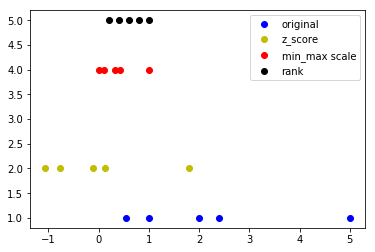

In [28]:
plt.plot(X, w, 'ob', label='original')

X1 = X - np.mean(X)
X1 = X1 / np.std(X)

plt.plot(X1, w + 1, 'oy', label='z_score') # стандартизация


X1 = X - np.min(X)
X1 = X1 / (np.max(X) - np.min(X))


plt.plot(X1, w + 3, 'or', label='min_max scale')

RNK = rankdata(X, method='average')
plt.plot(RNK / np.max(RNK), w + 4, 'ok', label='rank')

plt.legend()

> можно делать нормировки в пределах группы, если она имеет смысл - смотрите данные. иногда это помогает. 


In [29]:
df = pd.DataFrame({'sex': [0, 1, 1, 1, 0, 0],
                   'sum':[1000, 20000, 1500, 5000, 800, 50],
              })

df

,sex,sum
0,0,1000
1,1,20000
2,1,1500
3,1,5000
4,0,800
5,0,50


In [30]:
z_score = lambda x: (x - x.mean()) / x.std()
df['stand'] = df.groupby('sex').transform(z_score)

In [31]:
df

,sex,sum,stand
0,0,1000,0.765392
1,1,20000,1.136246
2,1,1500,-0.746192
3,1,5000,-0.390055
4,0,800,0.366057
5,0,50,-1.131449


Вещественные признаки

- деформация (функция над признаком)
- нормировка (специальный вид деформации) 
- новые признаки (функции над несколькими, например сумма, полиномы, и тд) 
- дискретизация (binning)

- делать деформацию, если она делает похожим распределение по признаку на нормальное (логарифм, корень, что нибудь специфичное)
- нормировка - приведение признаков в одну шкалу - для k-nn, SVM, logreg

# Дубликаты

Обычно они нам мешают, но не всегда. Бывает что просто иногда недостаточно данных. Тогда важно сохранить распределение классов.

In [32]:
df = pd.DataFrame({'sex': [0, 1, 1, 1, 0, 0, 0],
                   'sum':[1000, 20000, 1500, 5000, 800, 50, 50],
              })

df

,sex,sum
0,0,1000
1,1,20000
2,1,1500
3,1,5000
4,0,800
5,0,50
6,0,50


In [33]:
df.duplicated(subset=['sex', 'sum'], keep='first')

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

# Новые признаки

Конкатенация категориальных

In [34]:
df = pd.DataFrame({'sex': ['m', 'm', 'w', 'm', 'w'],
                   'sum':[2100, 14000, 20000, 1500, 2100],
              })

df

,sex,sum
0,m,2100
1,m,14000
2,w,20000
3,m,1500
4,w,2100


In [35]:
df['new'] = df['sex'] + ' + ' + df['sum'].astype(str)

In [36]:
df

,sex,sum,new
0,m,2100,m + 2100
1,m,14000,m + 14000
2,w,20000,w + 20000
3,m,1500,m + 1500
4,w,2100,w + 2100


##### Counter encoding

In [37]:
_counter = {}

for i in df['sex'].values:
    _counter[i] = _counter.get(i,0) + 1

In [38]:
_counter

{'m': 3, 'w': 2}

> какие проблемы?

- коллизии 
- новые категории


Обычно мелкие категории объединяют в одну 

##### One hot

In [39]:
df = pd.DataFrame({'sex': ['m', 'm', 'w', 'm', 'w', np.nan],
                   'sum':[2100, 14000, 20000, 1500, 2100, 0],
              })

df

,sex,sum
0,m,2100
1,m,14000
2,w,20000
3,m,1500
4,w,2100
5,NaN,0


In [40]:
pd.get_dummies(df.sex)

,m,w
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
5,0,0


In [41]:
pd.get_dummies(df.sex, dummy_na=True,)

,m,w,nan
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0
5,0,0,1


In [42]:
pd.get_dummies(df.sex, drop_first=True)

,w
0,0
1,0
2,1
3,0
4,1
5,0


_____

In [43]:
data_train.start_time = pd.to_datetime(data_train.start_time)

NameError: name 'data_train' is not defined

Характеристика момента времени

- час, минута, секунда (=0)
- время суток
- день, день недели, день года
- неделя, месяц
- время года, год
- праздник / выходной / особый день (первый понедельник месяца,
начало Олимпиады)

для циклических  cos и sin

In [44]:
def make_harmonic_features(value, period=24):
    value = (value / period) * 2 * np.pi
    return np.cos(value), np.sin(value)

from scipy.spatial import distance

distance.euclidean(make_harmonic_features(23), make_harmonic_features(1)), \
distance.euclidean(make_harmonic_features(1), make_harmonic_features(2)), \
distance.euclidean(make_harmonic_features(9), make_harmonic_features(15)), \
distance.euclidean(make_harmonic_features(9), make_harmonic_features(21))

(0.5176380902050415, 0.26105238444010315, 1.414213562373095, 2.0)

Использовать пары признаков, типа разница времён
- близость к дедлайну
- в один ли день недели/год и т.п.
- сколько осталось до конца след дня (помните задачу авито?)
- 

Использовать время для других признаков 
- например чтобы отсортировать по времени и использовать весовые схемы (кнн какой нибудь)

- валидация!!!!!!!!!!

# Агрегирование

In [45]:
df = pd.DataFrame({'p1': [10, 14, 24, 18],
                   'p2': [12, 18, 14, 16],
                   'p3': [8, 24, 22, 11],
                   'p4': [10, 15, 43, 18],
              })

In [46]:
df['mean'] = df[['p1', 'p2', 'p3', 'p4']].mean(axis=1)
df['std'] = df[['p1', 'p2', 'p3', 'p4']].std(axis=1)
df['min'] = df[['p1', 'p2', 'p3', 'p4']].min(axis=1)
df['max'] = df[['p1', 'p2', 'p3', 'p4']].max(axis=1)
df['median'] = df[['p1', 'p2', 'p3', 'p4']].median(axis=1)

In [47]:
df

,p1,p2,p3,p4,mean,std,min,max,median
0,10,12,8,10,10.00,1.632993,8,12,10.0
1,14,18,24,15,17.75,4.500000,14,24,16.5
2,24,14,22,43,25.75,12.284814,14,43,23.0
3,18,16,11,18,15.75,3.304038,11,18,17.0


In [48]:
# иногда бывает важно посмотреть на расстояние от объекта до максимального, минимального ....

df['p2'] - df[['p1', 'p2', 'p3', 'p4']].max(axis=1)

0     0
1    -6
2   -29
3    -2
dtype: int64

##### Признаки -  агрегирование по разным источникам

In [49]:
df = pd.DataFrame({'id': [1, 2, 3],
                   'sex': [0, 1, 1],
                   'age': [24, 54, 28],
                   'sum':[1000, 20000, 1500],
              })

appl_df = pd.DataFrame({'id': [1, 1, 1, 2, 2, 3, 3],
                   'date': [24, 25, 26, 14, 15, 16, 17],
                   'sum': [1000, 2000, 2000, 1000, 2500, 15000, 1800],
                   'просрочка':[0, 0, 1, 0, 0, 1, 1],
              })

In [50]:
df

,id,sex,age,sum
0,1,0,24,1000
1,2,1,54,20000
2,3,1,28,1500


In [51]:
appl_df

,id,date,sum,просрочка
0,1,24,1000,0
1,1,25,2000,0
2,1,26,2000,1
3,2,14,1000,0
4,2,15,2500,0
5,3,16,15000,1
6,3,17,1800,1


In [52]:
appl_df.groupby('id')['просрочка'].mean().reset_index()

,id,просрочка
0,1,0.333333
1,2,0.000000
2,3,1.000000


In [53]:
appl_df.groupby(['id', 'sum'])['просрочка'].mean().reset_index()

,id,sum,просрочка
0,1,1000,0.0
1,1,2000,0.5
2,2,1000,0.0
3,2,2500,0.0
4,3,1800,1.0
5,3,15000,1.0


> std, min, max, взвешиваем с весами, среднее + взвешенные с весами и тд